In [1]:
### IMPORTS ###
from __future__ import print_function
from __future__ import unicode_literals

import os
import sys
import threading
from datetime import datetime
from nbmultitask import ThreadWithLogAndControls
from histogram_helpers import exp_bucket_ranges, lin_bucket_ranges, ranges_pprint, metrics_hash, client_id_from_guid

# local uma interception server parameters
HOST = "127.0.0.1"       # <- localhost:5050
PORT = 5050
OUTPUT_DIR = "./chrome_logs"

import_logs = True

In [2]:
from metrics_mitmproxy import MetricsInterceptor
interceptor = MetricsInterceptor(host=HOST, port=PORT, output_dir=OUTPUT_DIR)

def chrome_interceptor(host, port, thread_print):
    interceptor.set_print(thread_print)
    interceptor.run()

# start chrome inceptor server in background
task = ThreadWithLogAndControls(target=chrome_interceptor,
                                args=(HOST, PORT,),
                                loop=True,
                                name="chrome interceptor")
task.control_panel()

Button(button_style='success', description='start', style=ButtonStyle())

Button(button_style='primary', description='watch', style=ButtonStyle())

Button(description='clear log', style=ButtonStyle())

Output()

In [5]:
# load historic logs
interceptor.import_logs()

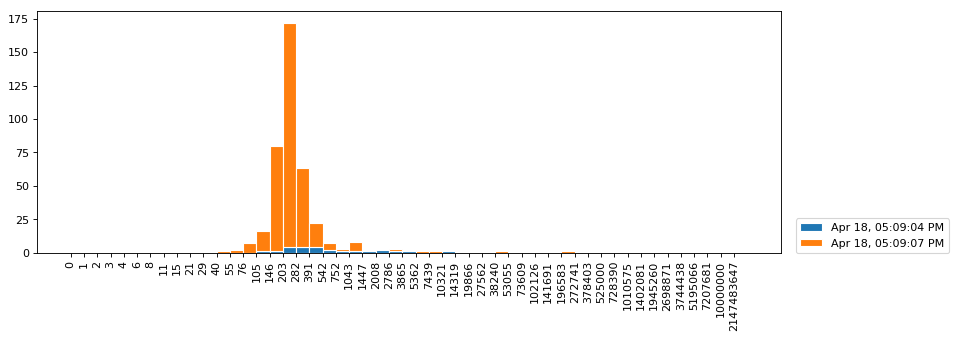

{'sample_sums': [35041, 388882], 'sample_sums_sum': 423923}

In [3]:
session_id = None
ranges = exp_bucket_ranges(1, 10000000, 50)
interceptor.uma.plot_hist(
    "Blink.MainFrame.UpdateTime",
    ranges,
    session_id=session_id
)

In [4]:
list(interceptor.uma.items())[-1]

{'errors': [],
 'payload_size': 58946,
 'payload_meta': '127.0.0.1:50266: POST https://clientservices.googleapis.com/uma/v2 HTTP/2.0',
 'payload_sha1': 'dac7065b5ae22f98add0a3f0b45d69abe5c3332e',
 'payload_time': datetime.datetime(2019, 4, 18, 17, 9, 7, 722803),
 'proto_message': client_id: 308036359640015554
 session_id: 77
 system_profile {
   build_timestamp: 1554267600
   app_version: "73.0.3683.103-64"
   uma_enabled_date: 1553140800
   application_locale: "en-US"
   os {
     name: "Windows NT"
     version: "10.0.17763"
   }
   hardware {
     cpu_architecture: "x86_64"
     system_ram_mb: 24492
     dll_base: 140714917429248
     hardware_class: ""
     screen_count: 2
     primary_screen_width: 1920
     primary_screen_height: 1080
     gpu {
       vendor_id: 4318
       device_id: 4083
       driver_version: "353.30"
       driver_date: "6-17-2015"
       gl_vendor: "Google Inc."
       gl_renderer: "ANGLE (NVIDIA Quadro K420 Direct3D11 vs_5_0 ps_5_0)"
     }
     max_dpi_x:

In [ ]:
# times in milliseconds
h1 = 1000*60*60  # <- 1 hour in ms

session_id = 36
hist_name = "Session.TotalDuration"
ranges = exp_bucket_ranges(1, h1
                           , 50)
plot_hist(
    hist_name,
    ranges,
    session_id=session_id
)

In [ ]:
# example of how to get int64 client_id form the |client_id2| guid shown under edge://local-state
client_guid = "699ddb8b-1e9a-4387-88df-70ea8a910b97"
client_id = client_id_from_guid(client_guid, signed=True)

# get histogram |hash_name| form its plain text name
hash_name = metrics_hash("Session.TotalDuration")
print("client_id:", client_id, "\nhash_name:", hash_name)